#### This notebook extends the calculations of chapter 3.2 of the book. The masses of the particles are not neglected. For some readers the discussion of polarization effects might be of interest.

### 1) Introduction
A jupyter notebook to calculate basic QED cross sections: electron positron annihilation into muon pairs and electron muon scattering. (If you want to run this notebook on your own system, you have to download heppackv0.py and the figure file Kap2fig8.jpg.) 

In the textbooks these processes are treated using the trace technique for obtaining the spin sums. We simply calculate each amplitude explicitly.
As a first step the package sympy and the private package heppackv0 have to be imported. 

In [25]:
from sympy import *

In [26]:
import heppackv0 as hep

Definition of the variables used: $p_1$=incoming electron, $p_2$ incoming positron,
$p_3$ outgoing muon, $p_4$ outgoing antimuon. Each 4 momentum is characterized by energy, mass, polar angle azimuth angle. We use the CM system. Python requires definition of the symbols. 

In [27]:
E,M,m,theta,alpha=symbols('E M m theta alpha',real=True)
t,t0,s,s0,phi,P,beta,p=symbols('t t0,s,s0,phi,P,beta,p',real=True)

In [28]:
p1=[E,m,0,0]
p2=[E,m,pi,pi]
p3=[E,M,theta,0]
p4=[E,M,pi-theta,pi]

### 2) The amplitudes 
The amplitudes are products of currents divided by the propagator. The products of currents are provided by
heppackv0. There are 8 independent helicity amplitudes $T_{fi}=T(\lambda_3 \lambda_4;\lambda_1 \lambda_2)$ for incoming positrons with positive helicity $\lambda_2$. The 8 amplitudes with negative helicity $\lambda_2$ are not independent but are up to a possible phase factor given by $T(-\lambda_3 -\lambda_4;-\lambda_1 -\lambda_2)$ due to the parity invariance of the electromagnetic interaction.

1) $T(-+;-+)$ :

The amplitude 
$$t_1=-e^{2}\bar{v}_+(p_2)\gamma^{\mu}u_-(p_1)\bar{u}_-(p_3)\gamma _{\mu}v_+(p_4)\frac{1}{q^{2}}$$
is without the charge factor $e^2=4\pi\alpha$ given by

In [29]:
t1=-hep.dotprod4(hep.vbu(p2,1,p1,-1),hep.ubv(p3,-1,p4,1))/4/E**2
t1

and for the other combinations of helicities

2) $T(--;-+)$ :

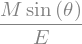

In [30]:
t2=-hep.dotprod4(hep.vbu(p2,1,p1,-1),hep.ubv(p3,-1,p4,-1))/4/E**2
t2

3) $T(++;-+)$ :

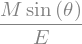

In [31]:
t3=-hep.dotprod4(hep.vbu(p2,1,p1,-1),hep.ubv(p3,1,p4,1))/4/E**2	
t3

4) $T(+-;-+)$ :

In [32]:
t4=-hep.dotprod4(hep.vbu(p2,1,p1,-1),hep.ubv(p3,1,p4,-1))/4/E**2
t4

5) $T(-+;++)$ :

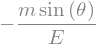

In [33]:
t5=-hep.dotprod4(hep.vbu(p2,1,p1,1),hep.ubv(p3,-1,p4,1))/4/E**2
t5

6) $T(--;++)$ :

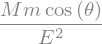

In [34]:
t6=-hep.dotprod4(hep.vbu(p2,1,p1,1),hep.ubv(p3,-1,p4,-1))/4/E**2
t6

7) $T(++;++)$ :

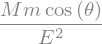

In [35]:
t7=-hep.dotprod4(hep.vbu(p2,1,p1,1),hep.ubv(p3,1,p4,1))/4/E**2
t7

8) $T(+-;++)$ :

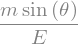

In [36]:
t8=-hep.dotprod4(hep.vbu(p2,1,p1,1),hep.ubv(p3,1,p4,-1))/4/E**2
t8

The following two lines are used for tests:

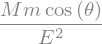

In [37]:
test1=-hep.dotprod4(hep.vbu(p2,-1,p1,-1),hep.ubv(p3,1,p4,1))/4/E**2;test1

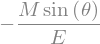

In [38]:
test2=-hep.dotprod4(hep.vbu(p2,-1,p1,1),hep.ubv(p3,1,p4,1))/4/E**2;test2

### 3) Cross sections
Because of parity invariance the 8 amplitudes containing $ \bar{v}_-$ need not to be calculated explicitly.
Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes

tsqav=


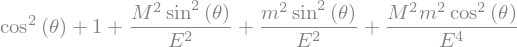

In [39]:
tsqav=simplify((t1**2+t2**2+t3**2+t4**2+t5**2+t6**2+t7**2+t8**2)/2)
print('tsqav=')
tsqav

This can be expressed by the invariants $s,t,t_0$ (remember $s$= CM energy squared, $t$=four momentum transfer squared, $t_0=t-m^2-M^2$):

tsqav_inv=


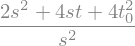

In [40]:
tsqav_inv=2*(2*t0**2+s**2+2*t*s)/s**2
print('tsqav_inv='); tsqav_inv

Proof: Calulate  $s,t,t_0$ by their CM values

In [41]:
tCM=m**2+M**2-2*E**2+2*sqrt(E**2-m**2)*sqrt(E**2-M**2)*cos(theta)
tCM

In [42]:
t0CM=tCM-m**2-M**2
t0CM

In [43]:
sCM=4*E**2
sCM

and then:

In [44]:
tsqav_invv1=tsqav_inv.subs(s,sCM)
tsqav_invv2=tsqav_invv1.subs(t,tCM)
tsqav_invv3=tsqav_invv2.subs(t0,t0CM)
proof=simplify(tsqav_invv3-tsqav)
proof

dsigma/dt is obtained by multipliying with the charge factor $e^4=16\pi^2\alpha^2$ and dividing by 

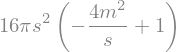

In [45]:
factor=16*pi*s**2*(1-4*m**2/s)
factor

resulting in

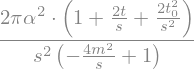

In [46]:
dsigdt=2*pi*alpha**2/s**2*1/(1-4*m**2/s)*(1+2*t0**2/s**2+2*t/s)
dsigdt

In [47]:
proof=simplify(dsigdt-16*pi**2*alpha**2/factor*tsqav_inv)
proof

That is
$$\frac{\mathrm{d}\sigma }{\mathrm{d}t}=\frac{2\pi\alpha^{2}}{s^{2}}\frac{1}{1-4m^{2}/s}\left(1+\frac{2t_{0}^{2}}{s^{2}}+\frac{2t}{s}\right)\enspace.$$
Expressed in CM variables we get for  $m=0$:

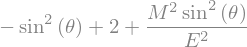

In [48]:
tsqav_invv4=simplify(tsqav_invv3.subs(m,0))
tsqav_invv4

$d\sigma/d\Omega$ is easily calculated:

dsigdtv1=


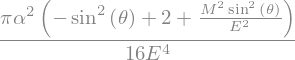

In [49]:
factor1=factor.subs(m,0)
factor2=factor1.subs(s,sCM)
dsigdtv1=16*pi**2*alpha**2/factor2*tsqav_invv4
print('dsigdtv1='); dsigdtv1

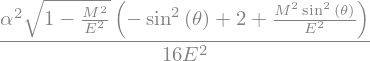

In [50]:
dsigdOm=dsigdtv1*E**2*sqrt(1-M**2/E**2)/pi
dsigdOm

or using $\beta_{\mu}=\sqrt{1-M^2/E^2}$
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\frac{\alpha^{2}\beta _{\mu}}{16E^{2}}\left(1+\frac{M^{2}}{E^{2}}+\beta _{\mu}^{2}\cos^{2}\Theta\right)\enspace.$$
For $m=M=0$ we have
$$\frac{\mathrm{d}\sigma}{\mathrm{d}t}=\frac{2\pi\alpha^{2}}{s^{2}}\left(\frac{t^{2}+u^{2}}{s^{2}}\right)\enspace$$
or

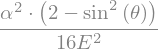

In [52]:
dsigdOmv1=dsigdOm.subs(M,0)
dsigdOmv1

that is
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}(e^{-}e^{+}\rightarrow\mu^{-}\mu^{+})=\frac{\alpha^{2}}{16E^{2}}(1+\cos^{2}\Theta)$$
with the total cross section

sigQED=


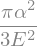

In [53]:
sigQED=2*pi*integrate(sin(theta)*dsigdOmv1,(theta,0,pi))
print('sigQED=')
sigQED

or
$$\sigma_{QED}=\frac{4\pi\alpha^{2}}{3s}\enspace.$$


### 4)  Polarized beams
It is also very interesting to study myon production by polarized electrons and positrons. In electron positron storage rings the beams become polarized after a while with the positron spin along the field (upward) and the electron spin downward. The standard method is again using traces and/or discussing general properties of products of currents. Having all amplitudes available the direct calculation is easy after understanding the kinematics.

We take the field along the x-axis (see figure). 
![](Kap2fig8.jpg) 

Instead of calculating the production of myons in the direction $\phi$ in the xy plane we consider the equivalent kinematical situation of $e^+$ incoming along $\phi$, $e^-$ in the opposite direction, production of myons (antimyons) along the $z$ (-$z$) axis. Thus we don't need to set up new $\phi$ dependent vectors $p_3,p_4$. 

x-axis upward spin states of positrons travelling in direction $\phi$ in the xy plane are calculated from the first column of the transformation matrix 
$$D^{{1/2}}=\left(\begin{matrix}\cos(\theta/2)&-\mathrm{e}^{{-\mathrm{i}\phi}}\sin(\theta/2)\\ \mathrm{e}^{{\mathrm{i}\phi}}\sin(\theta/2)&\cos(\theta/2)\end{matrix}\right)\enspace.$$
i.e. with $\theta=\pi/2$
$$\left|\uparrow\right\rangle={\textstyle\frac{1}{\sqrt{2}}\left(|\frac{1}{2}\rangle+\mathrm{e}^{{\mathrm{i}\phi}}|\frac{-1}{2}\rangle\right)}$$

Likewise from the second column for electrons with spin down
$$\left|\downarrow\right\rangle={\textstyle\frac{1}{\sqrt{2}}\left(-\mathrm{e}^{{\mathrm{-i}\phi}}|\frac{1}{2}\rangle+|\frac{-1}{2}\rangle\right)}$$

The translation into helicity states on the right hand side results in (watch the flip for electrons travelling in the opposite direction):
$$\begin{array}[]{ll}\left|e^+\uparrow\right\rangle&={\textstyle\frac{1}{\sqrt{2}}\left(|e^+_+\rangle+\mathrm{e}^{{\mathrm{i}\phi}}|e^+_-\rangle\right)}\\ \left|e^-\downarrow\right\rangle&={\textstyle\frac{1}{\sqrt{2}}\left(-\mathrm{e}^{{-\mathrm{i}\phi}}|e^-_-\rangle+|e^-_+\rangle\right)}\enspace.\end{array}$$
The initial state is given by the product of these states, for $m=0$ only the mixed states contribute to the current as can be seen from section 2. 
$$\left|e^+\uparrow\right\rangle\left|e^-\downarrow\right\rangle=\textstyle\frac{1}{2}\left(-\mathrm{e}^{{-\mathrm{i}\phi}}|e^-_-\rangle|e^+_+\rangle+\mathrm{e}^{{\mathrm{i}\phi}}|e^-_+\rangle|e^+_-\rangle\right)\enspace .$$ Lets start with $\mu^-_-\mu^+_+$.
Because of parity invariance the amplitude
$$\bar{v}_-(p_2)\gamma^{\mu}u_+(p_1)\bar{u}_-(p_3)\gamma _{\mu}v_+(p_4)\frac{1}{q^{2}}$$
equals $t_4$ and therefore the amplitude pol1 for $\mu^-_-\mu^+_+$ production is


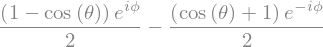

In [29]:
pol1tmp=(-exp(-I*phi)*t1+exp(I*phi)*t4)/2
pol1tmp

In [30]:
pol1=-cos(phi)*cos(theta)+I*sin(phi);print('pol1='); pol1

pol1=


Similarly for $\mu^-_+\mu^+_-$

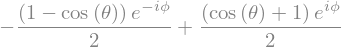

In [31]:
pol2tmp=(-exp(-I*phi)*t4+exp(I*phi)*t1)/2
pol2tmp

In [32]:
pol2=cos(phi)*cos(theta)+I*sin(phi);pol2

In [33]:
polsqP=2*simplify(pol1*conjugate(pol1))
polsqP

In [34]:
polsqP=2-2*sin(theta)**2*cos(phi)**2;polsqP

For $M=0$ no other amplitudes contribute ($t_2=t_3=0$). The final result therefore reads
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}(e^{-}_\downarrow e^{+}_\uparrow\rightarrow\mu^{-}\mu^{+})=\frac{\alpha^{2}}{8E^{2}}(1-\sin^{2}\theta\cos^{2}\phi)\enspace $$

as in the standard reference Y.S.Tsai, PRD12, 3533 (1975).

The polarization of the beams is never complete. Designing the product of polarizations by $P^2$ with
$ 0\leq P^2 \leq 1$ we must add polsqP and polsqU in an obvious manner.

In [35]:
polsqU=1+cos(theta)**2;polsqU

In [36]:
sig=P**2*polsqP+(1-P**2)*polsqU;sig

In [37]:
simplify(sig)

or alternatively

In [38]:
sigalt=polsqU-P**2*sin(theta)**2*cos(2*phi);sigalt

In [39]:
simplify(sig-sigalt)

Finally we follow the custom of the experimentalists, to take the storage ring plane spanned by the $x$ and $z$ axis  as scattering plane and the field along the $y$ axis. With $\phi\rightarrow \pi/2-\phi$ we get
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}(e^{-}_\downarrow e^{+}_\uparrow\rightarrow\mu^{-}\mu^{+})=\frac{\alpha^{2}}{16E^{2}}(1+\cos^{2}\theta +P^2\sin^{2}\theta\cos 2\phi)\enspace $$



### 5) Mott and Rutherford scattering
The cross section for electron myon scattering can be immediately obtained from tsqav_inv with the substitution $s\leftrightarrow t$ following from crossing symmetry. 

tsqav_sc=


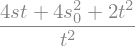

In [40]:
tsqav_sc=2*(2*s0**2+t**2+2*t*s)/t**2
print('tsqav_sc='); tsqav_sc

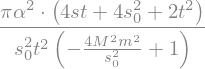

In [41]:
16*pi**2*alpha**2/(16*pi*s0**2*(1-4*m**2*M**2/s0**2))*tsqav_sc

$$\frac{\mathrm{d}\sigma }{\mathrm{d}t}(e\mu\rightarrow e\mu)=\frac{4\pi\alpha^{2}}{t^{2}}
\frac{1}{1-4m^{2}M^2/s_0^2}\left(1+\frac{t^{2}}{2s_0^{2}}+\frac{ts}{s_0^2}\right)\enspace.$$

Scattering on muons at rest (Lab system) reads with $s_0=s-m^2-M^2=2EM$, $p=\sqrt{E^2-m^2}$, $\beta=p/E$

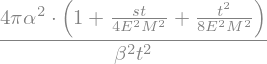

In [42]:
dsigdtLab=4*pi*alpha**2/t**2/beta**2*(1+t**2/8/E**2/M**2+t*s/4/E**2/M**2);dsigdtLab

An important application is $M\rightarrow\infty$ yielding the Mott cross section for 
electron scattering in a Coulomb field. For the scattering of low energy electrons $s\approx M^2$
holds, resulting in

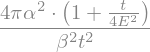

In [43]:
dsigdtMott=4*pi*alpha**2/t**2/beta**2*(1+t/4/E**2);dsigdtMott

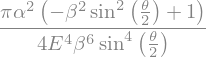

In [44]:
dsigdtMottv1=dsigdtMott.subs(t,-4*beta**2*E**2*sin(theta/2)**2);dsigdtMottv1

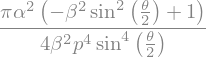

In [45]:
dsigdtMottv1.subs(E,p/beta)

or finally with $dt=p^2d\Omega/\pi$ 

$$\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_{\rm Mott}
=\frac{\alpha^{2}}{4{p}^{2}\beta^{2}\sin^{4}(\theta/2)}\left(1-\beta^{2}\sin^{2}(\theta/2)\right)$$

For $\beta\rightarrow 0$ one has $p\rightarrow m\beta$ and only the Rutherford cross section survives:

$$\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_{\rm Ruth}
=\frac{\alpha^{2}}{4{m}^{2}\beta^{4}\sin^{4}(\theta/2)}$$

Another important application of line 41 is myon scattering of electrons at rest. Using the second equality in
$t=(p_a-p_e)^2=(k_a-k_e)^2$ we get $t=2(E-E')M$, withe $E'$ the energy of the outgoing myon. Defining the relative energy loss $y=-t/s_0=(E-E')/E$ we get

$$\frac{\mathrm{d}\sigma}{\mathrm{d}y}(\mu e\rightarrow \mu e)=\frac{2\pi\alpha^{2}}{Em\beta_\mu^2 y^{2}}\left(1-y\frac{s}{s_{0}}+\frac{y^{2}}{2}\right)$$

the starting point for calculating the energy loss of myons in matter.